done


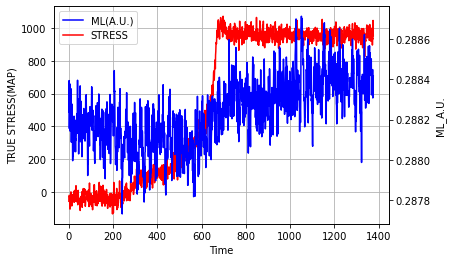

In [28]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import fracture

#csv파일 형식 바꾸기!

"""setting values"""
path = 'D:\experiment data\concerete\\20210128\con800n(uvon)\img'
path_save= 'D:\experiment data\concerete\\20210128\con800n(uvon)\img/A'

#part2 , location must be x1<x2, y1<y2

slice_x1 = 439
slice_x2 = 578
slice_y1 = 560
slice_y2 = 673

file_list = os.listdir(path)
count = 0
result = []

for file in file_list:
    if file.endswith(".jpg"):
        im = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)/255
        im_calculate = np.array(im)
        img_box = im_calculate[slice_y1:slice_y2, slice_x1:slice_x2]
        ave = np.average(img_box)
        result = np.append(result, [ave])

print("done")


ml_avg = result
tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))
time, strain, stress = tension_data[:, 0], tension_data[:, 3], tension_data[:, 4]*3000

#graph part
##############

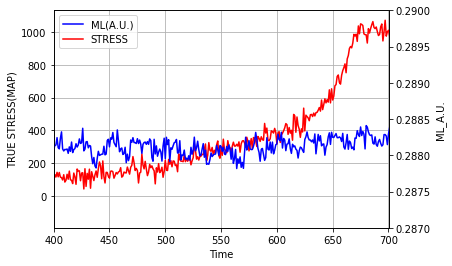

In [39]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.set_xlabel('Time')
ax1.set_ylabel('ML_A.U.')
ax.set_ylabel('TRUE STRESS(MAP)')
line1 = ax1.plot(time, ml_avg, color='b', label="ML(A.U.)")
line2 = ax.plot(time, stress, color='r', label="STRESS")
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)
ax.set_xlim(400,700)
ax1.set_ylim(0.287,0.29)
ax.grid()
plt.show()
fig.savefig(path_save+'/graph.png', dpi = 1000)

27 gas 202 dst


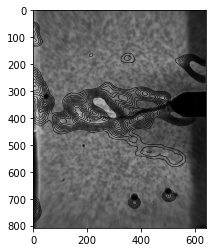

In [58]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob

path = r'E:\experiment data\aluminum\2021-01-27\0.05mmsec_125f_epoxy_dic\dic'
save_path= r'E:\experiment data\aluminum\2021-01-27\0.05mmsec_125f_epoxy_dic\dic'

img = glob.glob(path+'/C*.jpg')
if not img:
    print("Image read false!")
    sys.exit()

num=8
count = 1

src_ = cv2.imread(img[num], cv2.IMREAD_GRAYSCALE)

src_0 = cv2.imread(img[0], cv2.IMREAD_GRAYSCALE)
dst = cv2.subtract(src_, src_0)
"""표준편차 양 바꾸면서 그래프 그리기 3*3갯수로 만들기"""

# fig, ax = plt.subplots(3,3, figsize=(15,15))
# for i in range(0,3):
#     for j in range(0,3):
#         gas_sigma = i*10+j*5+1
#         gas = cv2.GaussianBlur(dst,(0,0), gas_sigma)
#         ax[i][j].imshow(src1,cmap='gray')
#         cs = ax[i][j].contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
#         ax[i][j].set_title(str(gas_sigma)+'gas sigma, level max'+str(int(np.max(gas))))

gas = cv2.GaussianBlur(dst,(0,0), 18)
plt.imshow(src_,cmap='gray')
# cs = plt.contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
cs = plt.contour(gas, [i for i in range(8,gas.max()-5)],  colors='black', linewidths = 0.5)
plt.savefig(save_path+'/%d.png'%num)
print(gas.max(),'gas', src_.max(),'dst')
count += 1

plt.show()

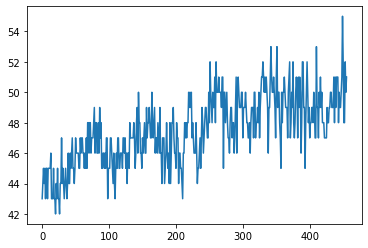

In [155]:
x = src_0[498,80:536]
plt.plot(x)